# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Let’s attempt to predict the survival of a horse based on various observed medical conditions. Load the data from ‘horses.csv’ and observe whether it contains missing values.

In [48]:
df=pd.read_csv('c:/edureka/horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
surgery                  299 non-null object
age                      299 non-null object
hospital_number          299 non-null int64
rectal_temp              239 non-null float64
pulse                    275 non-null float64
respiratory_rate         241 non-null float64
temp_of_extremities      243 non-null object
peripheral_pulse         230 non-null object
mucous_membrane          252 non-null object
capillary_refill_time    267 non-null object
pain                     244 non-null object
peristalsis              255 non-null object
abdominal_distention     243 non-null object
nasogastric_tube         195 non-null object
nasogastric_reflux       193 non-null object
nasogastric_reflux_ph    53 non-null float64
rectal_exam_feces        197 non-null object
abdomen                  181 non-null object
packed_cell_volume       270 non-null float64
total_protein            266 non-null

In [50]:
df.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

# observing missing values

In [51]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

# Handling missing vaules for Non-categorical features by filling Median

In [52]:
nasogastric_reflux_ph_median=df.nasogastric_reflux_ph.median()
abdomo_protein_median=df.abdomo_protein.median()
rectal_temp_median=df.rectal_temp.median()
pulse_median=df.pulse.median()
respiratory_rate_median=df.respiratory_rate.median()
packed_cell_volume_median=df.packed_cell_volume.median()
total_protein_median=df.total_protein.median()

In [53]:
df.nasogastric_reflux_ph=df.nasogastric_reflux_ph.fillna(nasogastric_reflux_ph_median)
df.abdomo_protein=df.abdomo_protein.fillna(abdomo_protein_median)
df.rectal_temp=df.rectal_temp.fillna(rectal_temp_median)
df.pulse=df.pulse.fillna(pulse_median)
df.respiratory_rate=df.respiratory_rate.fillna(respiratory_rate_median)
df.packed_cell_volume=df.packed_cell_volume.fillna(packed_cell_volume_median)
df.total_protein=df.total_protein.fillna(total_protein_median)

In [54]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph      0
rectal_exam_feces        102
abdomen                  118
packed_cell_volume         0
total_protein              0
abdomo_appearance        165
abdomo_protein             0
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

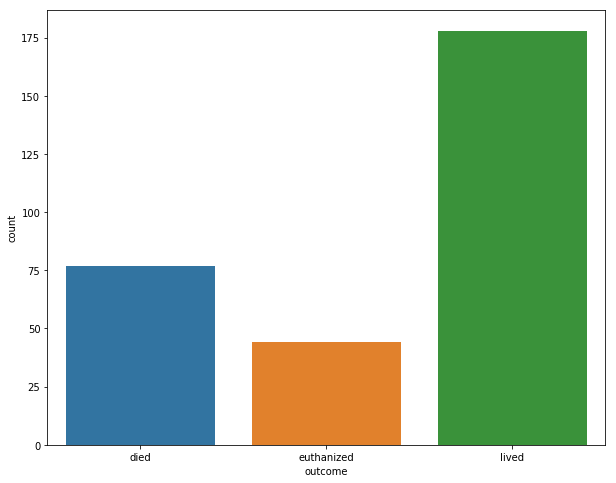

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(x='outcome',data=df)

In [56]:
df["outcome"].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

# 2.This dataset contains many categorical features, replace them with label encoding.

# Finding categorical features and taking it to New DataFrame

In [57]:
categorica_df = df.select_dtypes(include=['object']).copy()

In [58]:
categorica_df.head(20)

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,died,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,died,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,no,no
5,no,adult,warm,normal,pale_pink,less_3_sec,depressed,hypomotile,slight,slight,none,decreased,firm,NaN,lived,no,no
6,yes,adult,normal,normal,normal_pink,less_3_sec,mild_pain,hypomotile,moderate,none,none,decreased,distend_large,NaN,lived,yes,no
7,yes,adult,cool,NaN,NaN,less_3_sec,NaN,absent,slight,slight,none,decreased,distend_small,NaN,died,yes,no
8,no,adult,cool,absent,pale_pink,less_3_sec,severe_pain,absent,severe,slight,none,decreased,distend_large,NaN,euthanized,yes,no
9,no,young,normal,NaN,normal_pink,less_3_sec,extreme_pain,hypomotile,none,slight,none,decreased,NaN,clear,lived,no,yes


# observing missing values

In [59]:
print(categorica_df.isnull().values.sum())

954


In [60]:
print(categorica_df.isnull().sum())

surgery                    0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
rectal_exam_feces        102
abdomen                  118
abdomo_appearance        165
outcome                    0
surgical_lesion            0
cp_data                    0
dtype: int64


# 3. Replace the missing values by the most frequent value in each column.

# Handling Missing Values,Filling with Most occured Value

# Solution from Edureka 


# from sklearn.preprocessing import Imputer 

# imp = Imputer(missing_values="NaN",strategy="most_frequent",axis =0) 

# X_train = imp.fit_transform(X_train) X_test = imp.fit_transform(X_test)

In [61]:
categorica_df["temp_of_extremities"].value_counts()

cool      108
normal     78
warm       30
cold       27
Name: temp_of_extremities, dtype: int64

In [62]:
categorica_df=categorica_df.fillna({"temp_of_extremities": "cool"})

In [63]:
categorica_df["peripheral_pulse"].value_counts()

normal       114
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64

In [64]:
categorica_df=categorica_df.fillna({"peripheral_pulse": "normal"})

In [65]:
categorica_df['mucous_membrane'].value_counts()

normal_pink      79
pale_pink        57
pale_cyanotic    41
bright_pink      30
bright_red       25
dark_cyanotic    20
Name: mucous_membrane, dtype: int64

In [66]:
categorica_df=categorica_df.fillna({"mucous_membrane": "normal_pink"})

In [67]:
categorica_df['capillary_refill_time'].value_counts()

less_3_sec    187
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64

In [68]:
categorica_df=categorica_df.fillna({"capillary_refill_time": "less_3_sec"})

In [69]:
categorica_df['pain'].value_counts()

mild_pain       67
depressed       59
extreme_pain    42
alert           38
severe_pain     38
Name: pain, dtype: int64

In [70]:
categorica_df=categorica_df.fillna({"pain": "mild_pain"})

In [71]:
categorica_df['peristalsis'].value_counts()

hypomotile     127
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64

In [72]:
categorica_df=categorica_df.fillna({"peristalsis": "hypomotile"})

In [73]:
categorica_df['abdominal_distention'].value_counts()

none        75
slight      65
moderate    65
severe      38
Name: abdominal_distention, dtype: int64

In [74]:
categorica_df=categorica_df.fillna({"abdominal_distention": "none"})

In [76]:
categorica_df['nasogastric_tube'].value_counts()

slight         101
none            71
significant     23
Name: nasogastric_tube, dtype: int64

In [79]:
categorica_df=categorica_df.fillna({"nasogastric_tube": "slight"})

In [80]:
categorica_df['nasogastric_reflux'].value_counts()

none            119
more_1_liter     39
less_1_liter     35
Name: nasogastric_reflux, dtype: int64

In [81]:
categorica_df=categorica_df.fillna({"nasogastric_reflux": "none"})

In [82]:
categorica_df['rectal_exam_feces'].value_counts()

absent       79
normal       57
decreased    48
increased    13
Name: rectal_exam_feces, dtype: int64

In [83]:
categorica_df=categorica_df.fillna({"rectal_exam_feces": "absent"})

In [85]:
categorica_df['abdomen'].value_counts()

distend_large    78
distend_small    43
normal           28
other            19
firm             13
Name: abdomen, dtype: int64

In [86]:
categorica_df=categorica_df.fillna({"abdomen": "distend_large"})

In [87]:
categorica_df['abdomo_appearance'].value_counts()

cloudy           47
serosanguious    46
clear            41
Name: abdomo_appearance, dtype: int64

In [90]:
categorica_df=categorica_df.fillna({"abdomo_appearance": "cloudy"})

In [93]:
print(categorica_df.isnull().sum())

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
abdomo_appearance        0
outcome                  0
surgical_lesion          0
cp_data                  0
dtype: int64


# 2. This dataset contains many categorical features, replace them with label encoding.

# Checking Data Type of Categorial Features

In [94]:
categorica_df.dtypes

surgery                  object
age                      object
temp_of_extremities      object
peripheral_pulse         object
mucous_membrane          object
capillary_refill_time    object
pain                     object
peristalsis              object
abdominal_distention     object
nasogastric_tube         object
nasogastric_reflux       object
rectal_exam_feces        object
abdomen                  object
abdomo_appearance        object
outcome                  object
surgical_lesion          object
cp_data                  object
dtype: object

In [95]:
categorica_df.columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],
      dtype='object')

# Converting to Categorial Features

In [96]:
categorica_df[['surgery','age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data']] = categorica_df[['surgery','age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data']].astype('category')
categorica_df.dtypes

surgery                  category
age                      category
temp_of_extremities      category
peripheral_pulse         category
mucous_membrane          category
capillary_refill_time    category
pain                     category
peristalsis              category
abdominal_distention     category
nasogastric_tube         category
nasogastric_reflux       category
rectal_exam_feces        category
abdomen                  category
abdomo_appearance        category
outcome                  category
surgical_lesion          category
cp_data                  category
dtype: object

In [97]:
categorica_df.shape

(299, 17)

In [98]:
categorica_df.columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],
      dtype='object')

# Replacing categorical features with label encoding.

In [99]:
categorica_df["surgery"] = categorica_df["surgery"].cat.codes
categorica_df['age'] = categorica_df['age'].cat.codes
categorica_df['temp_of_extremities'] = categorica_df['temp_of_extremities'].cat.codes
categorica_df['peripheral_pulse'] = categorica_df['peripheral_pulse'].cat.codes
categorica_df['mucous_membrane'] = categorica_df['mucous_membrane'].cat.codes
categorica_df['capillary_refill_time'] = categorica_df['capillary_refill_time'].cat.codes
categorica_df['pain'] = categorica_df['pain'].cat.codes
categorica_df['peristalsis'] = categorica_df['peristalsis'].cat.codes
categorica_df['abdominal_distention'] = categorica_df['abdominal_distention'].cat.codes
categorica_df['nasogastric_tube'] = categorica_df['nasogastric_tube'].cat.codes
categorica_df['nasogastric_reflux'] = categorica_df['nasogastric_reflux'].cat.codes
categorica_df['abdomen'] = categorica_df['abdomen'].cat.codes
categorica_df['abdomo_appearance'] = categorica_df['abdomo_appearance'].cat.codes
categorica_df['rectal_exam_feces'] = categorica_df['rectal_exam_feces'].cat.codes
categorica_df['outcome'] = categorica_df['outcome'].cat.codes
categorica_df['surgical_lesion'] = categorica_df['surgical_lesion'].cat.codes
categorica_df['cp_data'] = categorica_df['cp_data'].cat.codes


In [100]:
categorica_df.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
0,0,0,1,3,3,2,2,0,2,2,2,1,0,1,0,0,0
1,1,0,1,2,4,1,3,0,3,2,2,0,4,1,1,0,0
2,0,0,2,2,5,1,3,2,1,2,2,3,3,1,2,0,1
3,1,1,0,2,2,2,1,0,2,0,0,1,0,2,0,1,1
4,0,0,1,2,2,2,3,2,1,2,2,0,0,1,0,0,0


In [101]:
categorica_df.columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'outcome',
       'surgical_lesion', 'cp_data'],
      dtype='object')

# Preparing Data for Model

In [102]:
X=categorica_df.drop(['outcome'],axis=1)
y=categorica_df['outcome']

In [103]:
X.columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion',
       'cp_data'],
      dtype='object')

# 4. Fit a decision tree classifier and observe the accuracy.

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [179]:
from sklearn.tree import DecisionTreeClassifier
dct_model=DecisionTreeClassifier()
dct_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [180]:
y_pred=dct_model.predict(X_test)
y_pred

array([2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 1, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0], dtype=int8)

[[ 8  4  8]
 [ 6  0  1]
 [ 5  6 22]]


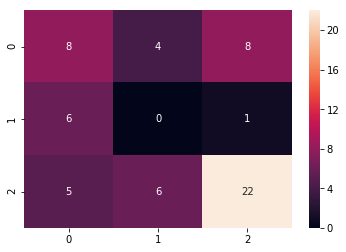

In [181]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [182]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.40      0.41        20
           1       0.00      0.00      0.00         7
           2       0.71      0.67      0.69        33

   micro avg       0.50      0.50      0.50        60
   macro avg       0.38      0.36      0.37        60
weighted avg       0.53      0.50      0.51        60



In [183]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


# Optimizing Decision Tree Performance

In [184]:
dct_model=DecisionTreeClassifier(criterion='entropy',max_depth=6)

In [185]:
dct_model.fit(X_train,y_train)
y_pred=dct_model.predict(X_test)

[[ 8  2 10]
 [ 4  1  2]
 [ 3  5 25]]
              precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.12      0.14      0.13         7
           2       0.68      0.76      0.71        33

   micro avg       0.57      0.57      0.57        60
   macro avg       0.44      0.43      0.43        60
weighted avg       0.56      0.57      0.56        60



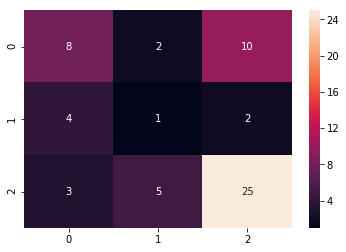

In [186]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(classification_report(y_test,y_pred))


In [187]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print('Accuracy :',metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.5666666666666667


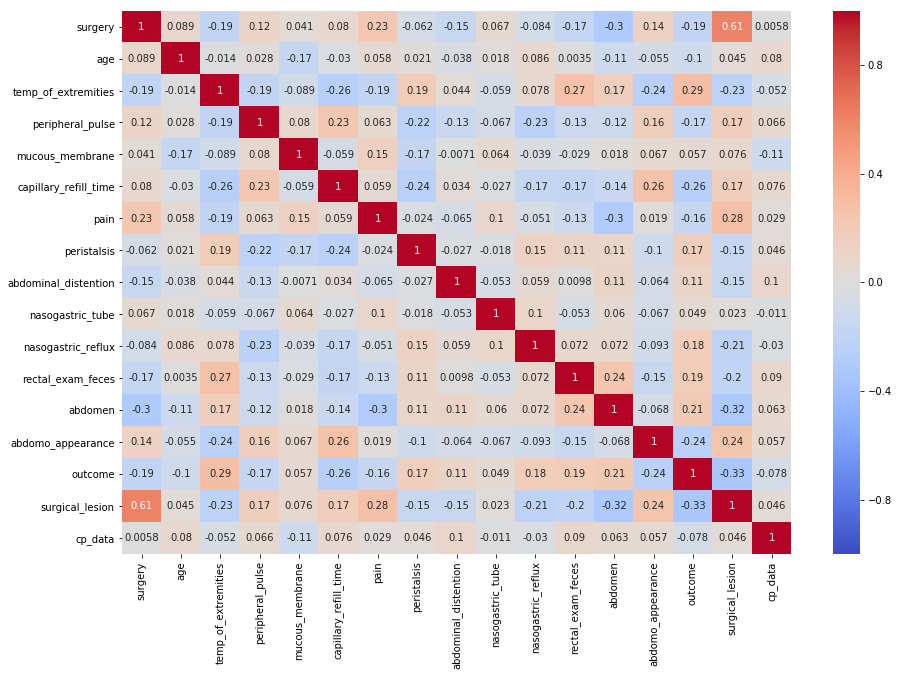

In [188]:
corr=categorica_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,vmin=-1,cmap='coolwarm',annot=True)

In [189]:
categorica_df.corr()[['outcome']].sort_values('outcome',ascending=False)

,outcome
outcome,1.000000
temp_of_extremities,0.290367
abdomen,0.214875
rectal_exam_feces,0.193004
nasogastric_reflux,0.181422
peristalsis,0.165844
abdominal_distention,0.112309
mucous_membrane,0.056852
nasogastric_tube,0.049156
cp_data,-0.078066


# 5. Fit a Random Forest Classifier and observe the accuracy.

In [190]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [191]:

rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [192]:
y_pred=rfc_model.predict(X_test)

[[10  2  8]
 [ 2  1  4]
 [ 4  1 28]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        20
           1       0.25      0.14      0.18         7
           2       0.70      0.85      0.77        33

   micro avg       0.65      0.65      0.65        60
   macro avg       0.53      0.50      0.50        60
weighted avg       0.62      0.65      0.63        60



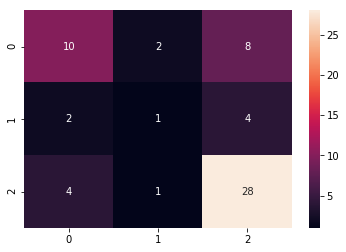

In [195]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(classification_report(y_test,y_pred))

In [196]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.65


# Optimizing Random Forest Classifier Performance

In [197]:
rfc_model=RandomForestClassifier(n_estimators=55)
rfc_model.fit(X_train,y_train)
y_pred=rfc_model.predict(X_test)

[[10  2  8]
 [ 2  3  2]
 [ 1  2 30]]
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.43      0.43      0.43         7
           2       0.75      0.91      0.82        33

   micro avg       0.72      0.72      0.72        60
   macro avg       0.65      0.61      0.62        60
weighted avg       0.72      0.72      0.70        60



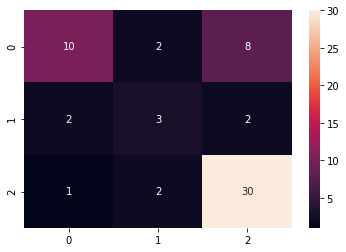

In [198]:
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
print(classification_report(y_test,y_pred))

In [199]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7166666666666667
